# Steam Games Dataset 2021-2025 (65k+)
Ссылка на оригинальный датасет: https://www.kaggle.com/datasets/jypenpen54534/steam-games-dataset-2021-2025-65k



In [ ]:
# TODO EDA по колонкам и распределениям, в ценах есть
# На кагле есть примеры анализа,который проводили участники

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jypenpen54534/steam-games-dataset-2021-2025-65k")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\chest\.cache\kagglehub\datasets\jypenpen54534\steam-games-dataset-2021-2025-65k\versions\4


In [3]:
import pandas as pd

df = pd.read_csv(path + '\\a_steam_data_2021_2025.csv')
df.head(5)

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues


<Axes: xlabel='release_year', ylabel='price'>

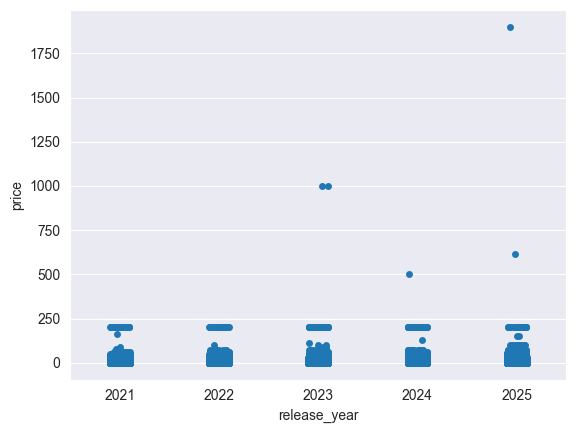

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.stripplot(df, x='release_year',y='price')

In [5]:
# # посмотрим графики цен за год и в зависимости от других колонок.
# # цены за год

# df_long = (
#     df
#     .assign(genre=df['genres'].str.split(';'))
#     .explode('genre')
#     .reset_index(drop=True)
# )
#
#
# sns.boxplot(
#     data=df_long,
#     x='genre',
#     y='price'
# )
# plt.xticks(rotation=45)

In [6]:
# посмотреть графики с инфой о продажах от года от жанра и прочее

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65521 entries, 0 to 65520
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            65521 non-null  int64  
 1   name             65521 non-null  object 
 2   release_year     65521 non-null  int64  
 3   release_date     65521 non-null  object 
 4   genres           65455 non-null  object 
 5   categories       65514 non-null  object 
 6   price            65521 non-null  float64
 7   recommendations  65521 non-null  int64  
 8   developer        65468 non-null  object 
 9   publisher        65338 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 5.0+ MB


In [8]:
# Есть отдельная колонка с годом релиза и колонка с датой релиза, которая так же содержит год.
# Можно оставить месяц от release_date
df['release_date'].value_counts()

release_date
2025             836
Q4 2025          355
December 2025    209
Oct 23, 2025     150
Jun 19, 2025     139
                ... 
Jan 17, 2021       2
Dec 28, 2025       2
Dec 20, 2025       1
Dec 13, 2025       1
Jun 13, 2021       1
Name: count, Length: 1828, dtype: int64

In [9]:
# "можно" было бы оставить, если бы не было ситуации, когда часть значений не содержит месяца как такового
# для начал удалим значения без полноценной даты, к этому можно вернуться потом.
df = df[~((df['release_date'] == 'Q4 2025') | (df['release_date'] == '2025'))]

In [10]:
# Значение 'December 2025' содержит достаточно информации для работы, приведем её к общему виду
df['release_date'] = df['release_date'].replace({'December 2025': 'Dec 01, 2025'})

In [11]:
# Теперь можем привести к datetime и оставить из колонки только месяц
df['release_date'] =  pd.to_datetime(df['release_date'])
df['relaase_month'] = df['release_date'].dt.month
df = df.drop('release_date', axis=1)

In [12]:
df.head(5)

,appid,name,release_year,genres,categories,price,recommendations,developer,publisher,relaase_month
0,3057270,Seafarer's Gambit,2024,Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios,7
1,3822840,Capitalist Misadventures,2025,Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios,7
2,3216640,The Beast and the Princess,2025,Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames,6
3,2403620,Air Twister,2023,Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ,11
4,1538040,Horde Slayer,2021,Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues,3


In [13]:
# Жанры и категории хранятся списком в одной колонке.
# Для начала было бы неплохо понять размах, сколько разных значений в целом бывает в колонке,
# К скольки бинарным колонкам это приведет
# Опять же можно было бы, если бы не было пустых значений.
df['genres'].isna().sum()

np.int64(66)

In [14]:
# Пустые значения заполним как 'Not specified'
df['genres'] = df['genres'].fillna('Genre not specified')

In [15]:
# Для представления признаков как бинарных можно использовать get_dummies pandas
dummies = df['genres'].str.get_dummies(sep=';')
df = df.join(dummies)

In [16]:
df.head(5)

,appid,name,release_year,genres,categories,price,recommendations,developer,publisher,relaase_month,...,Massively Multiplayer,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,3057270,Seafarer's Gambit,2024,Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios,7,...,0,1,0,0,0,0,1,0,0,0
1,3822840,Capitalist Misadventures,2025,Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios,7,...,0,0,0,1,0,0,1,0,0,0
2,3216640,The Beast and the Princess,2025,Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames,6,...,0,0,0,0,0,0,1,0,0,0
3,2403620,Air Twister,2023,Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ,11,...,0,0,0,0,0,0,0,0,0,0
4,1538040,Horde Slayer,2021,Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues,3,...,0,1,0,0,0,0,0,0,0,0


In [17]:
# Аналогично для категорий
df['categories'].isna().sum()

np.int64(6)

In [18]:
df['categories'] = df['categories'].fillna('Cat Not specified')

In [19]:
dummies_cat = df['categories'].str.get_dummies(sep=';')
df = df.join(dummies_cat)

In [20]:
# Дропнем колонки жанров и категорий
df = df.drop(['genres', 'categories'], axis=1)

In [21]:
df.shape

(64330, 86)

In [22]:
df.head(5)

,appid,name,release_year,price,recommendations,developer,publisher,relaase_month,Accounting,Action,...,Steam Turn Notifications,Steam Workshop,Stereo Sound,Subtitle Options,Surround Sound,Touch Only Option,Tracked Controller Support,VR Only,VR Support,VR Supported
0,3057270,Seafarer's Gambit,2024,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios,7,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3822840,Capitalist Misadventures,2025,7.99,0,Caramelo Studios,Caramelo Studios,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3216640,The Beast and the Princess,2025,12.99,0,Libragames,Libragames,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2403620,Air Twister,2023,24.99,0,YS Net,ININ,11,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1538040,Horde Slayer,2021,3.99,0,Wagner Rodrigues,Wagner Rodrigues,3,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#appid врятли принесет пользу,так же дропнем
df = df.drop('appid', axis=1)

In [24]:
# Колонки с названием игры, разработчиком и паблишером строковые, но если их все создать как бинарные получится очень много.
# Колонка с названием не несет как категория смысла вообще.
df['developer'].value_counts()

developer
EroticGamesClub                           215
Bully Revenge Studios                     119
Gamesforgames                              96
Do Games Limited                           90
Archor Wright                              88
                                         ... 
星雨魔法店                                       1
Gäng Gäng Studios                           1
Wave Atlas Interactive;Catvin Catowsky      1
Recall                                      1
North Star Studios                          1
Name: count, Length: 44744, dtype: int64

In [25]:
df['publisher'].value_counts()

publisher
EroticGamesClub                           215
BFG Entertainment                         172
8floor                                    150
Hede                                      142
Kagura Games                              119
                                         ... 
Wave Atlas Interactive;Catvin Catowsky      1
Recall                                      1
Amateurculture                              1
EXNOA LLC;Spike Chunsoft Co., Ltd.          1
Tlantico Studio                             1
Name: count, Length: 40696, dtype: int64

In [26]:
print(df['developer'].isna().sum())
print(df['publisher'].isna().sum())

53
183


In [28]:
# Название игры так же пока дропнем, есть смысл его обработать как текстовой признак если качество того потребует.
df = df.drop('name', axis=1)

In [33]:
# Категориальные фичи обработает Catboost, заполним там пропуски
df['developer'] = df['developer'].fillna('Not specified')
df['publisher'] = df['publisher'].fillna('Not specified')

In [29]:
df.head(5)

,release_year,price,recommendations,developer,publisher,relaase_month,Accounting,Action,Adventure,Animation & Modeling,...,Steam Turn Notifications,Steam Workshop,Stereo Sound,Subtitle Options,Surround Sound,Touch Only Option,Tracked Controller Support,VR Only,VR Support,VR Supported
0,2024,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios,7,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2025,7.99,0,Caramelo Studios,Caramelo Studios,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2025,12.99,0,Libragames,Libragames,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2023,24.99,0,YS Net,ININ,11,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,3.99,0,Wagner Rodrigues,Wagner Rodrigues,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Выделим таргет
X = df.drop(columns=['price'])
y = df['price']

In [35]:
# Разделим на трейн и тест
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from catboost import CatBoostRegressor
cat_features = ['developer', 'publisher']

model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
)
model.fit(X_train, y_train,cat_features=cat_features, eval_set=(X_test, y_test), use_best_model=True)


Learning rate set to 0.094537
0:	learn: 17.3086654	test: 13.9468563	best: 13.9468563 (0)	total: 229ms	remaining: 3m 48s
1:	learn: 16.9055858	test: 13.4729817	best: 13.4729817 (1)	total: 295ms	remaining: 2m 27s
2:	learn: 16.5687589	test: 13.0414644	best: 13.0414644 (2)	total: 358ms	remaining: 1m 58s
3:	learn: 16.2798359	test: 12.6622202	best: 12.6622202 (3)	total: 425ms	remaining: 1m 45s
4:	learn: 16.0346156	test: 12.3190672	best: 12.3190672 (4)	total: 477ms	remaining: 1m 34s
5:	learn: 15.8197883	test: 12.0237985	best: 12.0237985 (5)	total: 534ms	remaining: 1m 28s
6:	learn: 15.6406470	test: 11.7715074	best: 11.7715074 (6)	total: 572ms	remaining: 1m 21s
7:	learn: 15.4810682	test: 11.5410144	best: 11.5410144 (7)	total: 616ms	remaining: 1m 16s
8:	learn: 15.3536123	test: 11.3500610	best: 11.3500610 (8)	total: 660ms	remaining: 1m 12s
9:	learn: 15.2336909	test: 11.1923082	best: 11.1923082 (9)	total: 710ms	remaining: 1m 10s
10:	learn: 15.1319102	test: 11.0505602	best: 11.0505602 (10)	total: 76

In [41]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse:.2F}')

RMSE: 9.31
